In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("Walmart_Sales.csv")

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df["Date"]=pd.to_datetime(df["Date"], dayfirst= True)

In [5]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
df["Date"].dtype

dtype('<M8[ns]')

In [7]:
pd.isnull(df).sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
holiday_sales= df.groupby("Holiday_Flag")["Weekly_Sales"].mean().reset_index()

In [9]:
holiday_sales["Holiday_Flag"]= holiday_sales["Holiday_Flag"].map({0: "Non Holiday", 1: "Holiday"})
holiday_sales

,Holiday_Flag,Weekly_Sales
0,Non Holiday,1.041256e+06
1,Holiday,1.122888e+06


## Visualize Sales Comparison

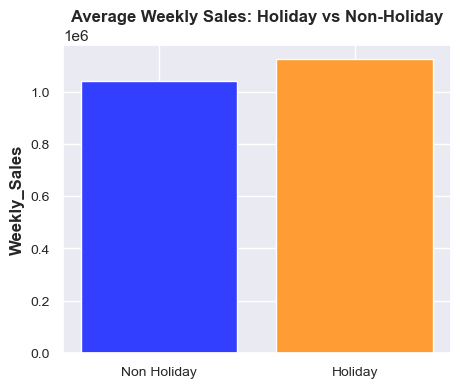

In [10]:
plt.figure(figsize=(5,4))
plt.bar(x= holiday_sales["Holiday_Flag"], height= holiday_sales["Weekly_Sales"], color=["#333fff", "#ff9c33"])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Average Weekly Sales: Holiday vs Non-Holiday", fontweight= "bold")
plt.ylabel("Weekly_Sales", fontweight="bold")
plt.show()

## Plot sales over time with holiday highlighting

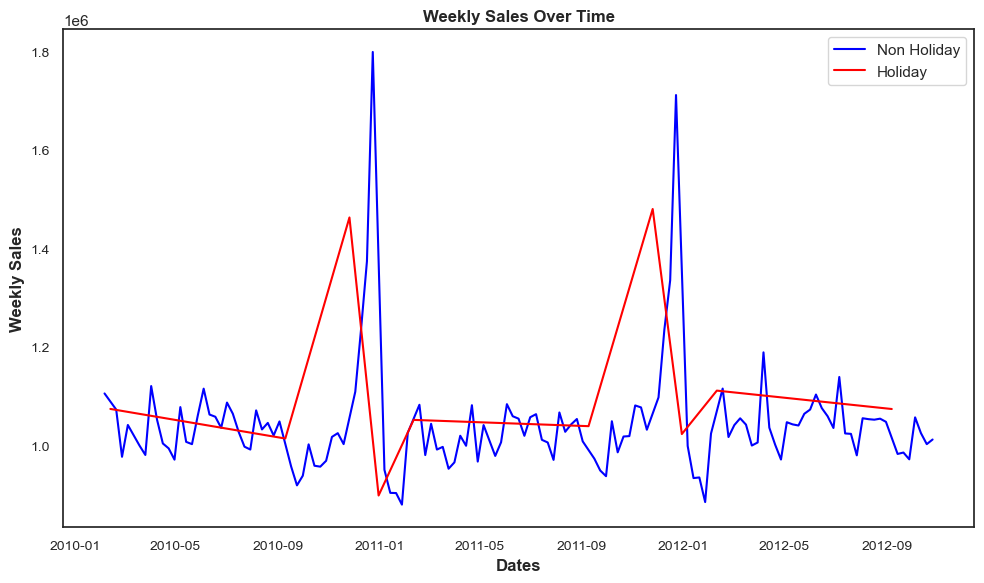

In [11]:
sns.set_style("white")
avg_sales = df.groupby(['Date', 'Holiday_Flag'])['Weekly_Sales'].mean().reset_index()
non_holiday = avg_sales[avg_sales["Holiday_Flag"] == 0]
holiday = avg_sales[avg_sales["Holiday_Flag"] == 1]
plt.figure(figsize=(10,6))
plt.plot(non_holiday["Date"], non_holiday["Weekly_Sales"], color="blue", label="Non Holiday")
plt.plot(holiday["Date"], holiday["Weekly_Sales"], color="red", label="Holiday")
plt.title("Weekly Sales Over Time", fontweight="bold")
plt.xlabel("Dates", fontweight="bold")
plt.ylabel("Weekly Sales", fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
store1 = df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].mean().reset_index()
pivot1= store1.pivot(index="Store", columns= "Holiday_Flag", values= "Weekly_Sales")
pivot1.columns= ["Non Holiday", "Holiday"]
pivot1["Average"]= pivot1[["Non Holiday", "Holiday"]].mean(axis=1)
top_holiday= pivot1.sort_values(by= "Holiday", ascending= False).head(10)
pivot_reset1= top_holiday.reset_index()
pivot_reset1["Store"]

0    20
1     4
2    14
3    10
4    13
5     2
6    27
7     6
8     1
9    19
Name: Store, dtype: int64

In [13]:
store2 = df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].mean().reset_index()
pivot2= store2.pivot(index="Store", columns= "Holiday_Flag", values= "Weekly_Sales")
pivot2.columns= ["Non Holiday", "Holiday"]
pivot2["Sales_Diff"]= abs(pivot2["Holiday"]- pivot2["Non Holiday"])
down_holiday= pivot2.sort_values(by= "Sales_Diff").head(10)
pivot_reset2= down_holiday.reset_index()
pivot_reset2["Store"]

0    30
1    43
2    33
3    38
4    36
5    44
6    42
7    37
8    25
9     3
Name: Store, dtype: int64

In [14]:
store = df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].mean().reset_index()
pivot= store.pivot(index="Store", columns= "Holiday_Flag", values= "Weekly_Sales")
pivot.columns= ["Non Holiday", "Holiday"]
pivot["Average"]= pivot[["Non Holiday", "Holiday"]].mean(axis=1)
top= pivot.sort_values(by= "Average", ascending= False).head(10)
pivot_reset= top.reset_index()
pivot_reset["Store"]

0    20
1     4
2    14
3    13
4    10
5     2
6    27
7     6
8     1
9    19
Name: Store, dtype: int64

## Store-wise Holiday Impact

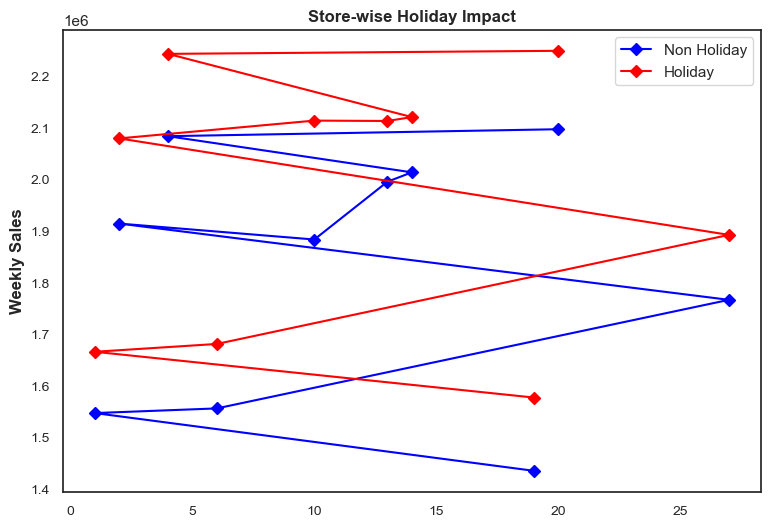

In [15]:
plt.figure(figsize=(9,6))
x= pivot_reset["Store"]
plt.plot(x, pivot_reset["Non Holiday"], marker= "D", color= "Blue", label= "Non Holiday")
plt.plot(x, pivot_reset["Holiday"], marker= "D", color= "Red", label= "Holiday")
plt.title("Store-wise Holiday Impact", fontweight= "bold")
plt.ylabel("Weekly Sales", fontweight= "bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

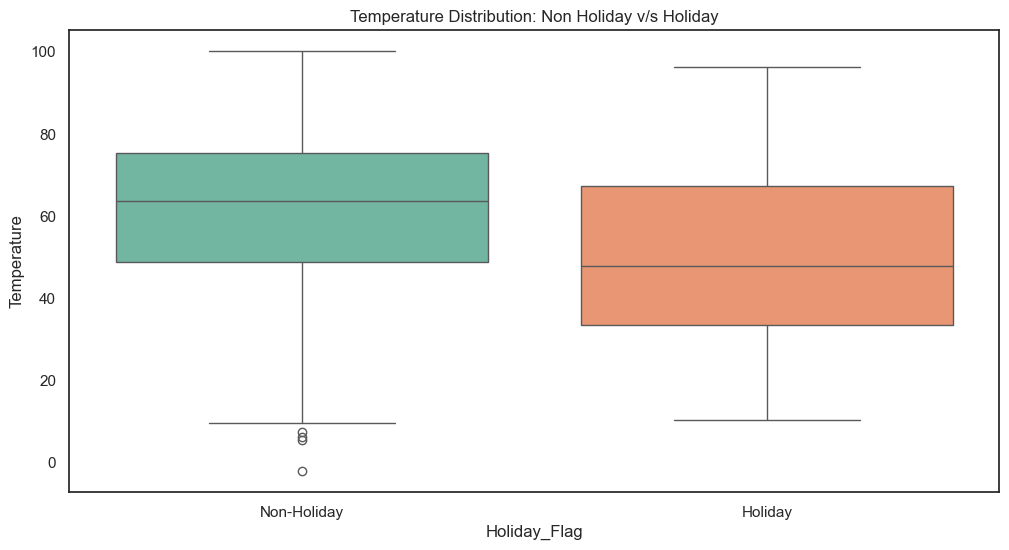

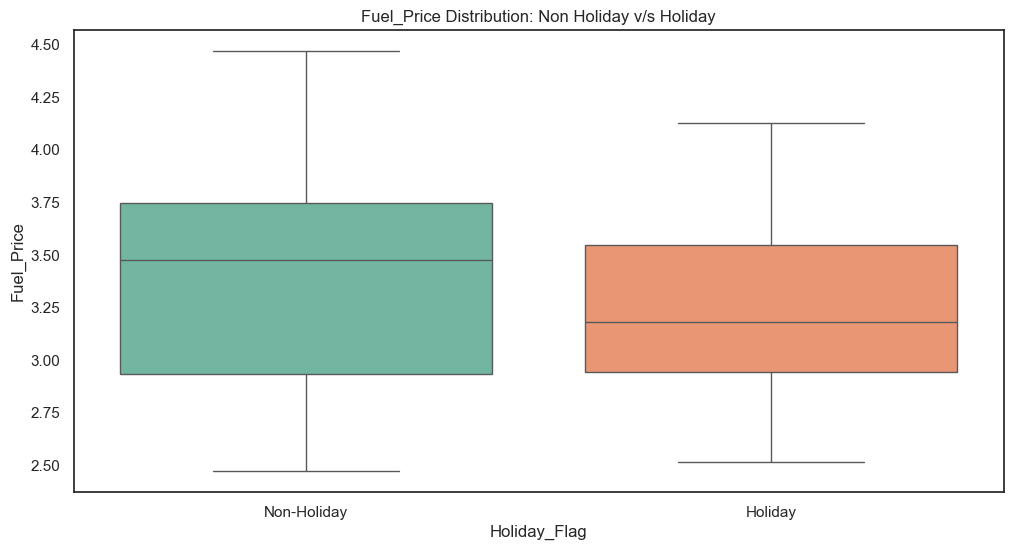

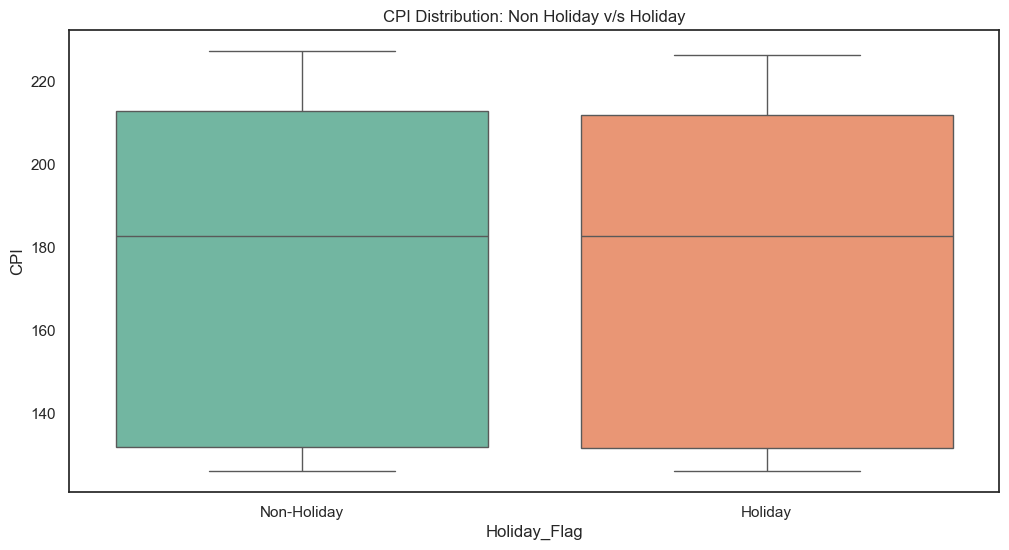

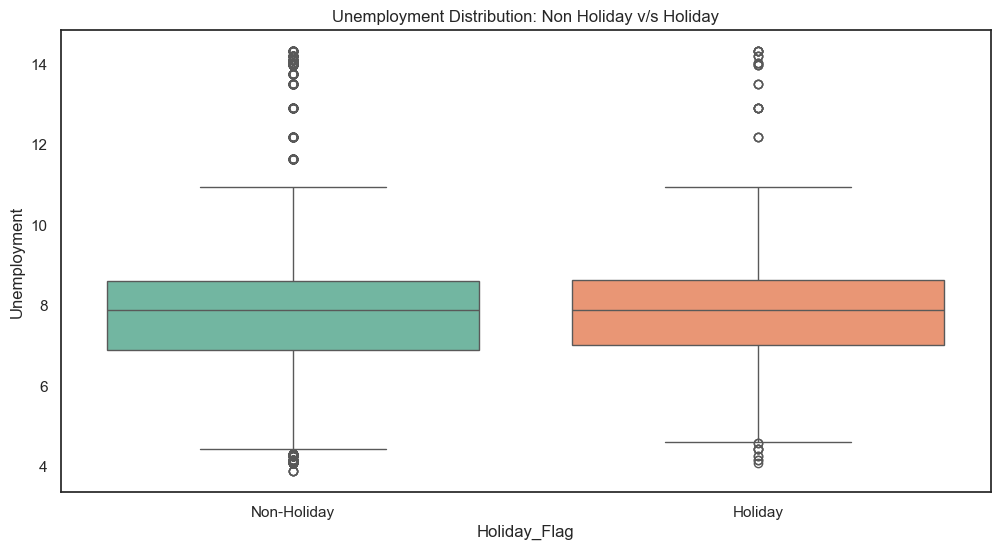

In [16]:
features= ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
for col in features:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x="Holiday_Flag", y=col, hue= "Holiday_Flag", palette= "Set2", legend= False)
    plt.title(f"{col} Distribution: Non Holiday v/s Holiday")
    plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
    plt.show()

## Top performer store and consistently higher average sales irrespective of holiday

In [17]:
store3 = df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].mean().reset_index()
pivot3= store3.pivot(index="Store", columns= "Holiday_Flag", values= "Weekly_Sales")
pivot3.columns= ["Non Holiday", "Holiday"]
holiday_avg= pivot3["Holiday"].mean()
non_holiday_avg= pivot3["Non Holiday"].mean()
top_perf= pivot3[(pivot3["Non Holiday"]> non_holiday_avg) & (pivot3["Holiday"]> holiday_avg)].copy()
top_perf["Avg"]= top_perf[["Non Holiday", "Holiday"]].mean(axis=1)
top_perf= top_perf.sort_values(by= "Avg", ascending= False).head(10)
top_perf= top_perf.reset_index()
top_perf["Store"]

0    20
1     4
2    14
3    13
4    10
5     2
6    27
7     6
8     1
9    19
Name: Store, dtype: int64

## Specific store where holidays have a counterintuitive (negative) effect on sales

In [18]:
store3 = df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].mean().reset_index()
pivot3= store3.pivot(index="Store", columns= "Holiday_Flag", values= "Weekly_Sales")
pivot3.columns= ["Non Holiday", "Holiday"]
pivot3["Diff"]= pivot3["Holiday"]-pivot3["Non Holiday"]
neg= pivot3[pivot3["Diff"]<0].sort_values(by="Diff")
neg=neg.reset_index()
neg

,Store,Non Holiday,Holiday,Diff
0,37,519755.562556,507525.050,-12230.512556
1,44,303253.622782,296035.601,-7218.021782
2,36,373953.448647,367640.630,-6312.818647
3,38,386049.080000,381509.878,-4539.202000
4,30,438708.962782,436859.307,-1849.655782


## Stores with minimal difference in sales during holidays and non holidays

In [40]:
store6 = df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].mean().reset_index()
pivot6= store6.pivot(index="Store", columns= "Holiday_Flag", values= "Weekly_Sales")
pivot6.columns= ["Non Holiday", "Holiday"]
pivot6["Diff"]= abs(pivot6["Holiday"]-pivot6["Non Holiday"])
neg1= pivot6.sort_values(by="Diff")
neg1=neg1.reset_index()
neg1.head(10)

,Store,Non Holiday,Holiday,Diff
0,30,438708.962782,436859.307,1849.655782
1,43,633127.613759,635946.278,2818.664241
2,33,259656.216316,262594.519,2938.302684
3,38,386049.080000,381509.878,4539.202000
4,36,373953.448647,367640.630,6312.818647
5,44,303253.622782,296035.601,7218.021782
6,42,555554.968797,567694.158,12139.189203
7,37,519755.562556,507525.050,12230.512556
8,25,704243.689850,739676.842,35433.152150
9,3,400064.846391,437811.050,37746.203609


## Average percentage increase in sales during holidays across all stores

In [19]:
holiday_avg_inc= df[df["Holiday_Flag"]==1]["Weekly_Sales"].mean()
non_holiday_avg_inc= df[df["Holiday_Flag"]==0]["Weekly_Sales"].mean()
percent_inc= ((holiday_avg_inc-non_holiday_avg_inc)/non_holiday_avg_inc)*100
percent_inc

7.839713033050179

## Variance comparison: Holiday v/s Non Holiday

In [20]:
store4 = df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].sum().reset_index()
holiday_var= store4[store4["Holiday_Flag"]==1]["Weekly_Sales"].var()
non_holiday_var= store4[store4["Holiday_Flag"]==0]["Weekly_Sales"].var()
print(holiday_var)
print(non_holiday_var)

34690130657711.64
5225485005944300.0


## Stores with higher average weekly sales on Non Holidays than on Holidays

In [29]:
store5 = df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].mean().reset_index()
pivot5= store5.pivot(index="Store", columns= "Holiday_Flag", values= "Weekly_Sales")
pivot5.columns= ["Non Holiday", "Holiday"]
holiday_avg_high= pivot5[pivot5["Holiday"]<pivot5["Non Holiday"]].copy()
holiday_avg_high["Diff"]= holiday_avg_high["Non Holiday"]-holiday_avg_high["Holiday"]
holiday_avg_high= holiday_avg_high.sort_values(by= "Diff", ascending= False)
holiday_avg_high=holiday_avg_high.reset_index()
holiday_avg_high["Store"]

0    37
1    44
2    36
3    38
4    30
Name: Store, dtype: int64

## Observations

#### 1. Holiday vs Non-Holiday Sales:
##### Average weekly sales are generally higher during holidays, but not all stores follow this trend like Store 37, Store 44, Store 36, Store 38 and Store 30.
##### Some stores show reduced sales during holidays, which is counterintuitive.

#### 2. Store Performance:
##### A few stores consistently show higher average sales regardless of holiday status like Store 20, Store 14, Store 4 etc. 
##### Store-wise variance in holiday performance is noticeable — indicating localized factors at play.

#### 3. Sales Variance:
##### Holiday weeks have higher variance in weekly sales compared to regular weeks.
##### Some weeks show outlier behavior (very high or low sales), possibly due to special events or external disruptions.

#### 4. Least Impacted Stores:
##### Certain stores show minimal difference in sales between holidays and non-holidays like Store 30, Store 43, Store 43 etc, suggesting a stable customer base or neutral holiday effect.

## Conclusions

##### Holidays do positively impact overall sales, but not uniformly across all stores.
##### Sales behavior is store-specific, suggesting that localized marketing or inventory planning may improve performance.
##### Historical data trends can be used to build predictive models for weekly sales.
##### Some stores can be flagged for investigation if their sales drop during holidays, which is not typical.

## Next Steps

#### Store-specific Strategy:
##### Dive deeper into underperforming stores during holidays.
##### Explore demographic or regional data (if available) to understand local factors.

#### Marketing Decisions:
##### Use the variance analysis to optimize promotional campaigns before high-sale weeks.
##### Target high-performing stores with aggressive marketing during holidays.

#### Inventory Planning:
##### Predict high-demand weeks per store to avoid stock-outs or overstocking.

